## The Circle Pendulum

Now let's try the weird pendulum that travelled in a circle.  As we saw in class, the equation of motion is
$$
\ddot{\theta} = \frac{a}{b} \nu^2 \cos(\theta - \nu t) - \frac{g}{b} \sin(\theta),
$$
where $a$ is the radius of the circle, $b$ is the length of the pendulum, and $\nu$ is the angular frequency of the circular motion.  Let's solve it numerically.

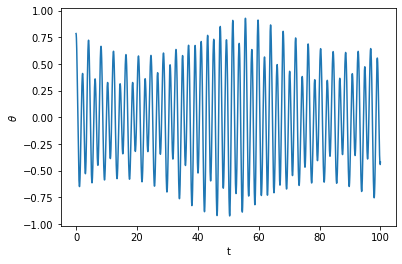

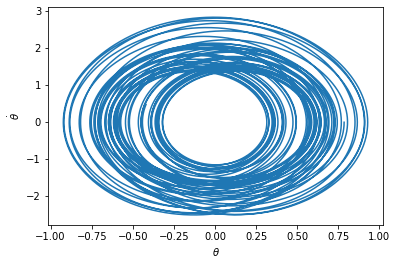

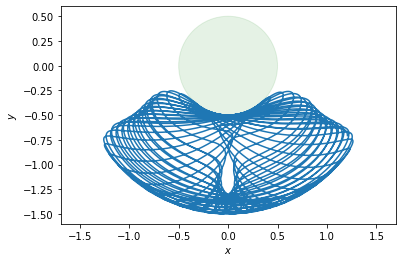

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

g = 9.8 # m/s^2
b = 1.0 # m
a = 0.5 # m
nu = 1.57 # rad/s -- so the period is about 4 s

t_start = 0.0 # times are in seconds
t_end = 100.0
dt = 0.0001

t = np.arange(t_start, t_end, dt)
N = len(t)
theta = np.zeros(N)
omega = np.zeros(N)

# our initial conditions -- let the pendulum go from rest at 45 degrees
theta[0] = np.pi/4.0
omega[0] = 0.0

for i in range(0, N-1):
    theta[i+1] = theta[i] + omega[i] * dt
    omega[i+1] = omega[i] + (a/b*nu*nu * np.cos(theta[i] - nu*t[i]) - g/b*np.sin(theta[i])) * dt

# plot the angular position of the pendulum as a function of time
plt.plot(t, theta)
plt.xlabel("t")
plt.ylabel(r'$\theta$')
plt.show()

# Even better is a phase plot
plt.plot(theta, omega)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.show()

# and ... y(x)
x = a * np.cos(nu * t) + b * np.sin(theta)
y = a * np.sin(nu * t) - b * np.cos(theta)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis('equal')
circ = plt.Circle((0, 0), radius=a, color='g', alpha=0.1)
ax.add_patch(circ)
plt.plot(x, y)

plt.show()